# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Conclusions
     Answer previous questions
     Propose hypothesis

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# Ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Set path
path = r'C:\Users\gered\OneDrive\Desktop\Boat Sales 01.24.A6\Boat Sales 23.01.24'

In [4]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boats_clean.csv'), index_col = False)

### 2. Data Cleaning

In [5]:
df.shape

(9301, 11)

In [6]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days', 'Country',
       'Price in EUR'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0                       int64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
Country                         object
Price in EUR                     int64
dtype: object

In [8]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,Price in EUR
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,226,Switzerland,3537
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,3490
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,64,Denmark,3367
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,3399
4,6,Catamaran,none,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,Switzerland,3816



#### Dropping columns Unnamed:0 (ID) and index

In [9]:
df = df.drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [10]:
# Rename columns whose names are too long
df.rename(columns={'Number of views last 7 days': 'Last 7 days views'}, inplace=True)

In [11]:
# checking changes
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Last 7 days views', 'Country', 'Price in EUR'],
      dtype='object')

#### Missing Values Check:

In [12]:
# Check for missing values
df.isnull().sum()

Boat Type            0
Manufacturer         0
Type                 0
Year Built           0
Length               0
Width                0
Material             0
Last 7 days views    0
Country              0
Price in EUR         0
dtype: int64

#### Duplicates Check:

In [13]:
# Find duplicates

df_dups = df[df.duplicated()]

In [14]:
df_dups.shape

(0, 10)

#### Mixed-Type Data:

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

### 3. Exploring Relationships

### Correlations:

In [16]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Print the names of numeric columns
print("Numeric columns:")
print(numeric_columns)

Numeric columns:
Index(['Year Built', 'Length', 'Width', 'Last 7 days views', 'Price in EUR'], dtype='object')


In [17]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   Year Built    Length     Width  Last 7 days views  \
Year Built           1.000000 -0.203817 -0.105219          -0.113590   
Length              -0.203817  1.000000  0.866782          -0.139246   
Width               -0.105219  0.866782  1.000000          -0.163561   
Last 7 days views   -0.113590 -0.139246 -0.163561           1.000000   
Price in EUR         0.105369  0.562843  0.517882          -0.008481   

                   Price in EUR  
Year Built             0.105369  
Length                 0.562843  
Width                  0.517882  
Last 7 days views     -0.008481  
Price in EUR           1.000000  


#### Create a correlation heatmap using seaborn:

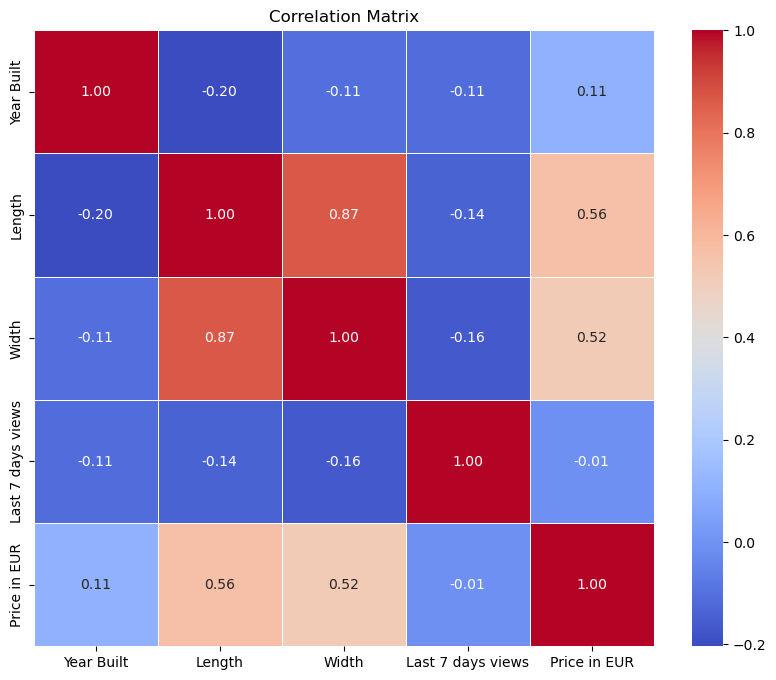

In [18]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

#### Strength of the Correlation:
    Values close to 1 or -1 indicate a strong correlation.
    Values close to 0 indicate a weak correlation.

#### The weak correlation between Price in EUR and other variables suggests that factors influencing the price are not strongly correlated with year built, length, or width.

### Scatterplots:

C:\Users\gered\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


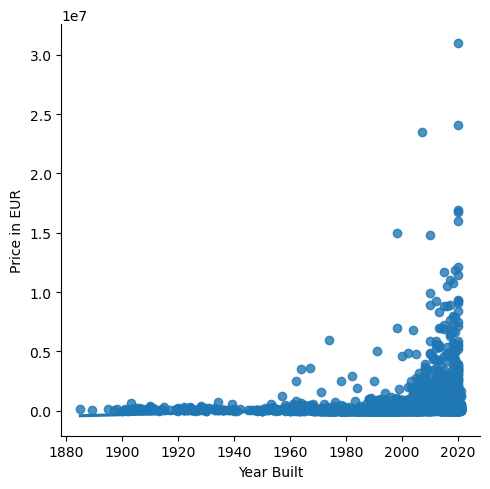

In [19]:
# Create a scatterplot for the "Year Built" and "Price in EUR" columns in seaborn

sns.lmplot(x = 'Year Built', y = 'Price in EUR', data = df)

#### Year Built and Price in EUR have a positive correlation (0.11), suggesting a weak positive relationship between the year a boat was built and its price."The more recent the year built, the higher the price."

C:\Users\gered\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


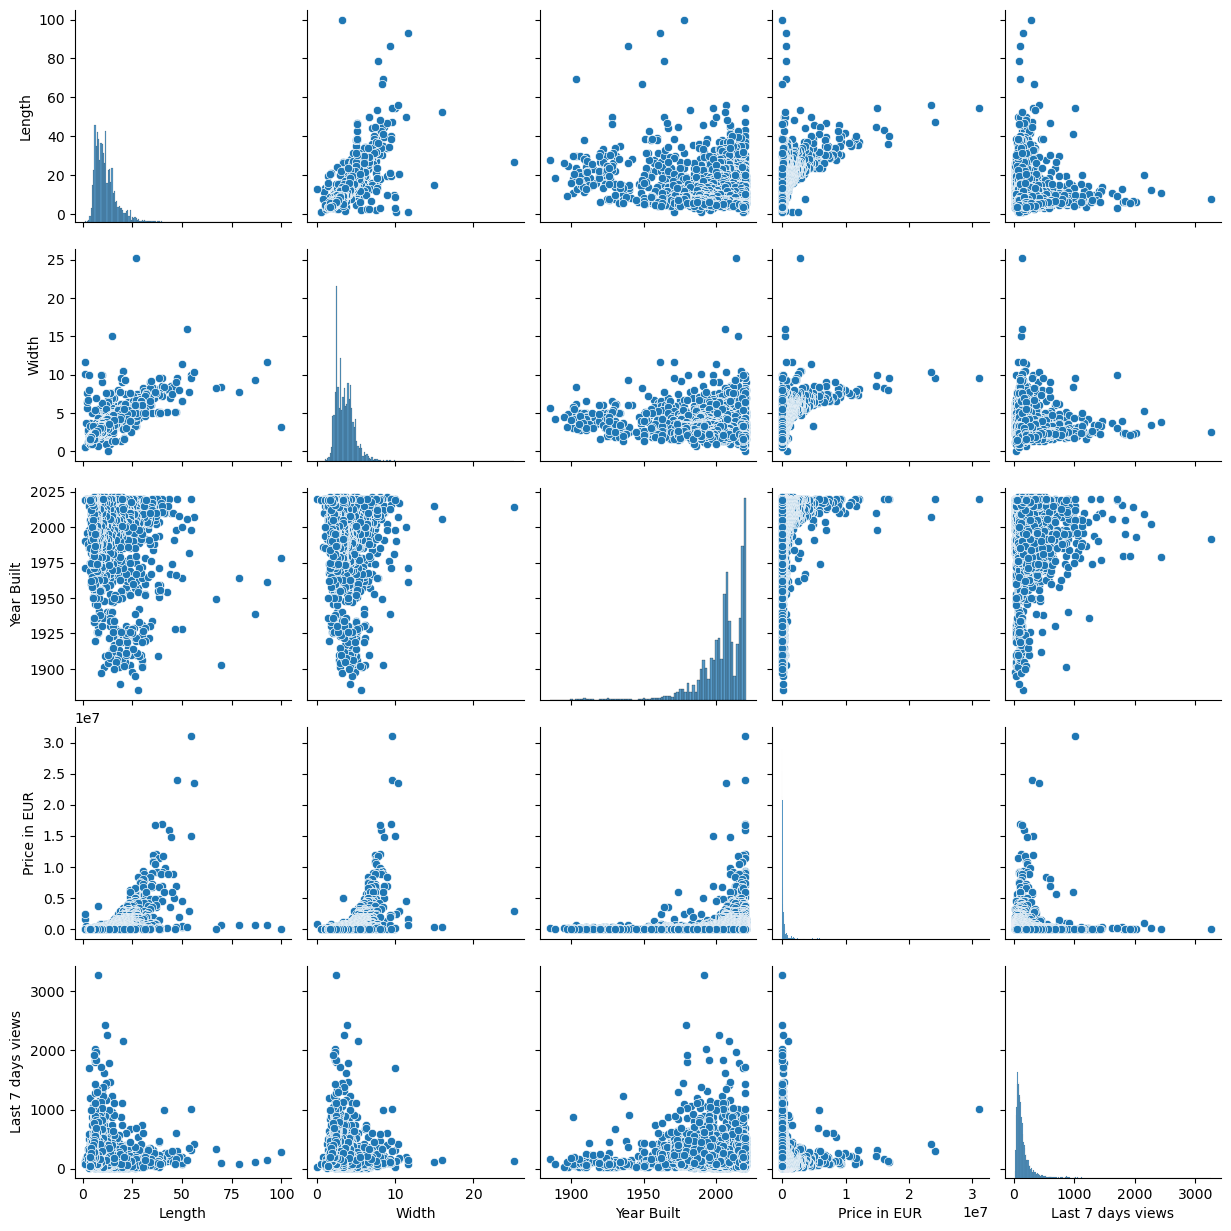

In [20]:
# Select variables of interest
Var_Pair = ['Length', 'Width', 'Year Built', 'Price in EUR', 'Last 7 days views']

# Filter the DataFrame to include only interested variables
interest_var = df[Var_Pair]

# Create a pair plot
sns.pairplot(interest_var)
plt.show()

#### Length and Width have a strong positive correlation (0.87), indicating that boats with longer lengths tend to have wider widths.
#### Year Built and Price in EUR have a positive correlation (0.11), suggesting a weak positive relationship between the year a boat was built and its price.
#### Length and Price in EUR have a moderate positive correlation (0.56), indicating that longer boats tend to have higher prices.

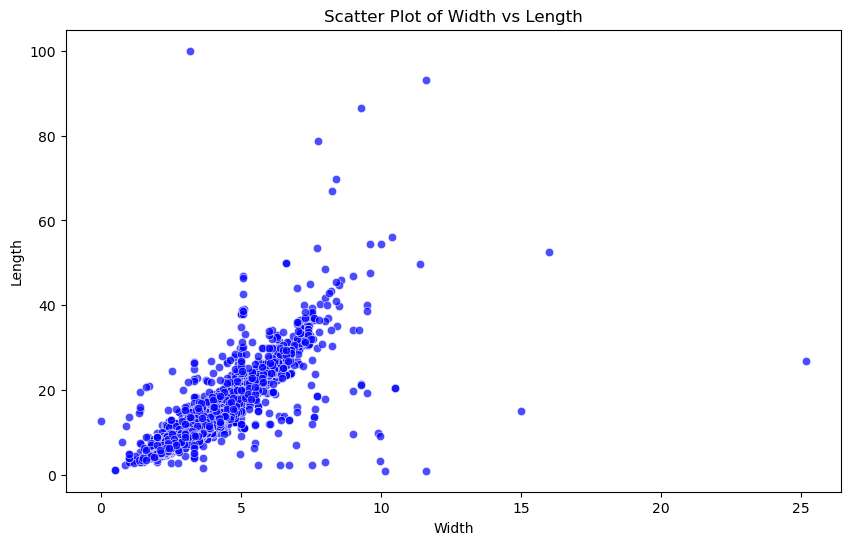

In [21]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='Width', y='Length', data=df, alpha=0.7, color='blue')

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Scatter Plot of Width vs Length')

# Show the plot
plt.show()


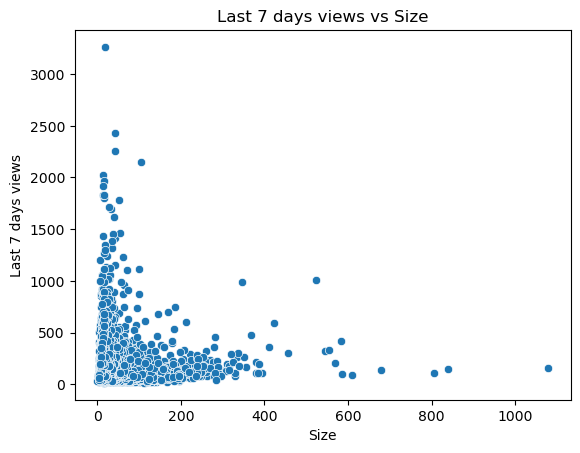

In [22]:
# Create a new variable 'Size' by combining 'Width' and 'Length'
df['Size'] = df['Width'] * df['Length']

# Scatter plot for Last 7 days views vs Size
sns.scatterplot(x='Size', y='Last 7 days views', data=df)
plt.title('Last 7 days views vs Size')
plt.show()


#### Last 7 days views has weak negative correlations with Year Built and Length, and a very weak negative correlation with Width. This suggests that newer or longer boats may not necessarily have more views in the last 7 days.

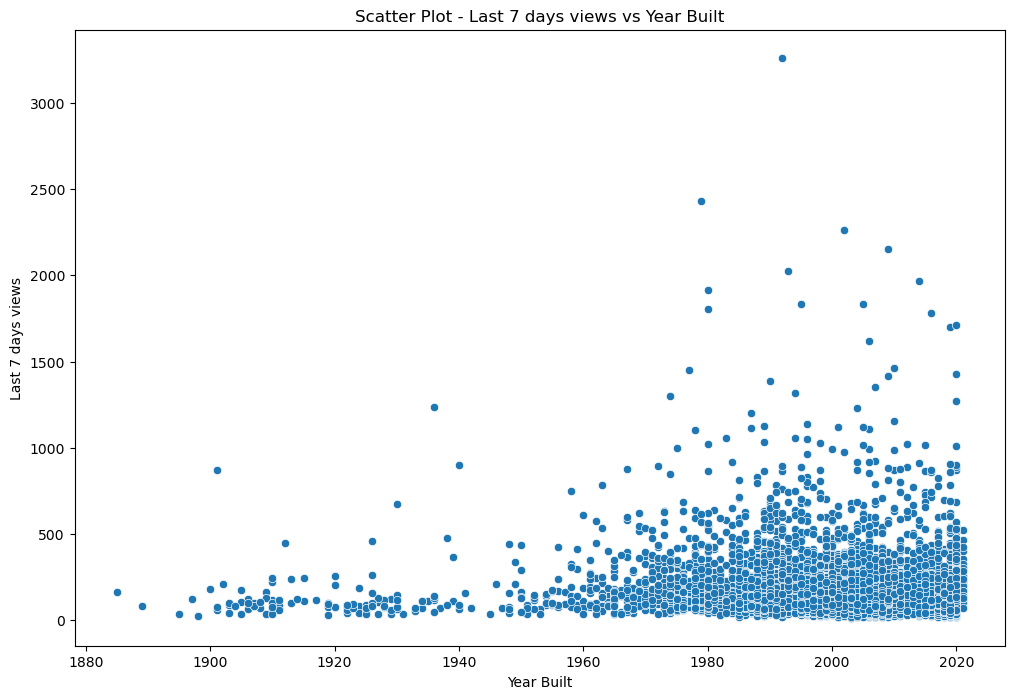

In [23]:
# Scatter plot for Last 7 days views vs Year Built
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year Built', y='Last 7 days views', data=df)
plt.title('Scatter Plot - Last 7 days views vs Year Built')
plt.show()


### Categorical Plots:

<Axes: xlabel='Price in EUR', ylabel='Count'>

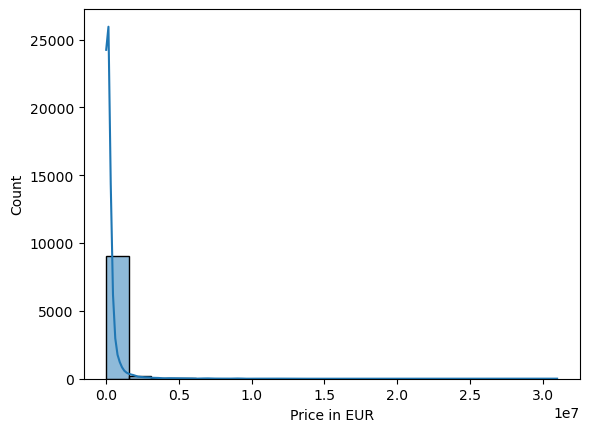

In [24]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df['Price in EUR'], bins = 20, kde = True)

#### The peak around 0-200,000 suggests that a significant number of boats have lower prices.
#### The right-skewed shape indicates that while there are many boats with lower prices, there are relatively fewer boats with higher prices.

In [25]:
df.describe()

,Year Built,Length,Width,Last 7 days views,Price in EUR,Size
count,9301.000000,9301.000000,9301.000000,9301.000000,9.301000e+03,9301.000000
mean,2004.912698,11.715313,3.550942,150.495001,3.028011e+05,47.883903
std,16.384805,5.996365,1.209069,154.877301,9.398733e+05,46.918452
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03,0.128000
25%,1999.000000,7.560000,2.550000,70.000000,4.490000e+04,19.546500
50%,2008.000000,10.490000,3.360000,108.000000,9.500000e+04,35.200000
75%,2018.000000,14.000000,4.250000,172.000000,2.495000e+05,59.770000
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,1078.800000


#### create a categorical variable, from a numerical variable:

In [26]:
df.loc[df['Price in EUR'] < 50000, 'Price category'] = 'Low price'

In [27]:
df.loc[(df['Price in EUR'] >= 50000) & (df['Price in EUR'] < 200000), 'Price category'] = 'Middle price'

In [28]:
df.loc[df['Price in EUR'] >= 200000, 'Price category'] = 'High price'

In [29]:
df['Price category'].value_counts(dropna = False)

Price category
Middle price    3838
High price      2773
Low price       2690
Name: count, dtype: int64

C:\Users\gered\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


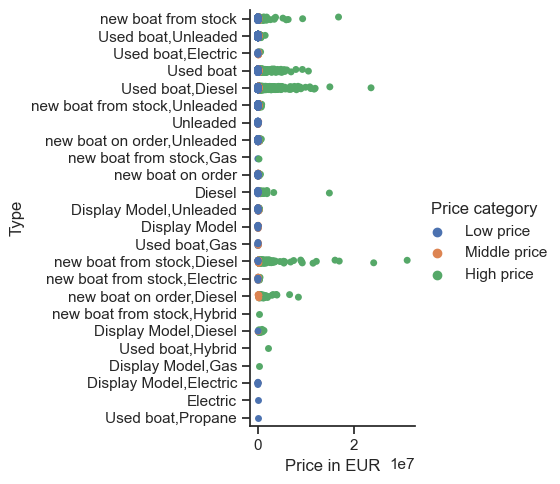

In [30]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="Price in EUR", y="Type", hue="Price category", data=df)

#### New Boat Diesel: Concentrated in the medium to high price range, suggesting that new boats with diesel engines can be more expensive.
#### Used Boat Diesel: Similar distribution to "Used Boat," but with some potential variation, possibly due to the diesel engine factor.
#### Used Boat of Propane: Concentrated in the low-price range, indicating that this specific type of used boat tends to have lower prices compared to others.

In [31]:
# fig = g.get_figure()
g.savefig("out.png") 

# the image will be saved in the working directory. 

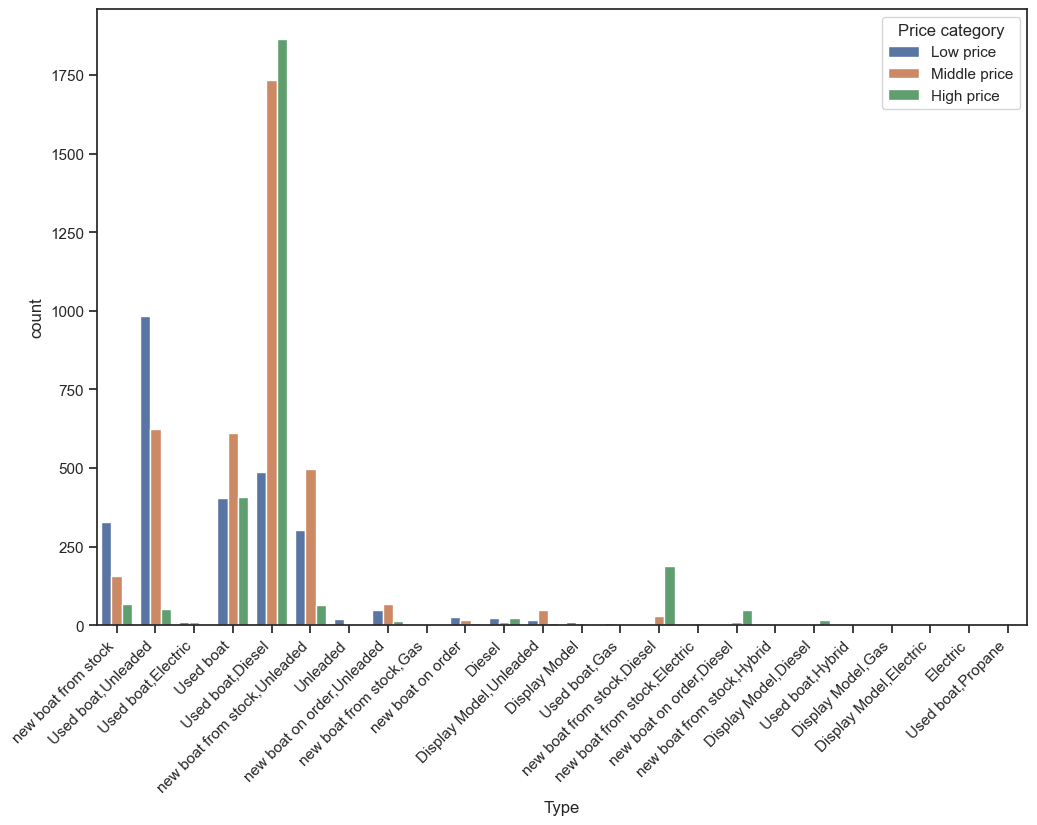

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Type', hue='Price category', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()


#### The type of condition of the boats shows us that there is a greater number of used boats, used diesel boats, offered on the web. where you can see that most of them are medium price or high price

C:\Users\gered\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

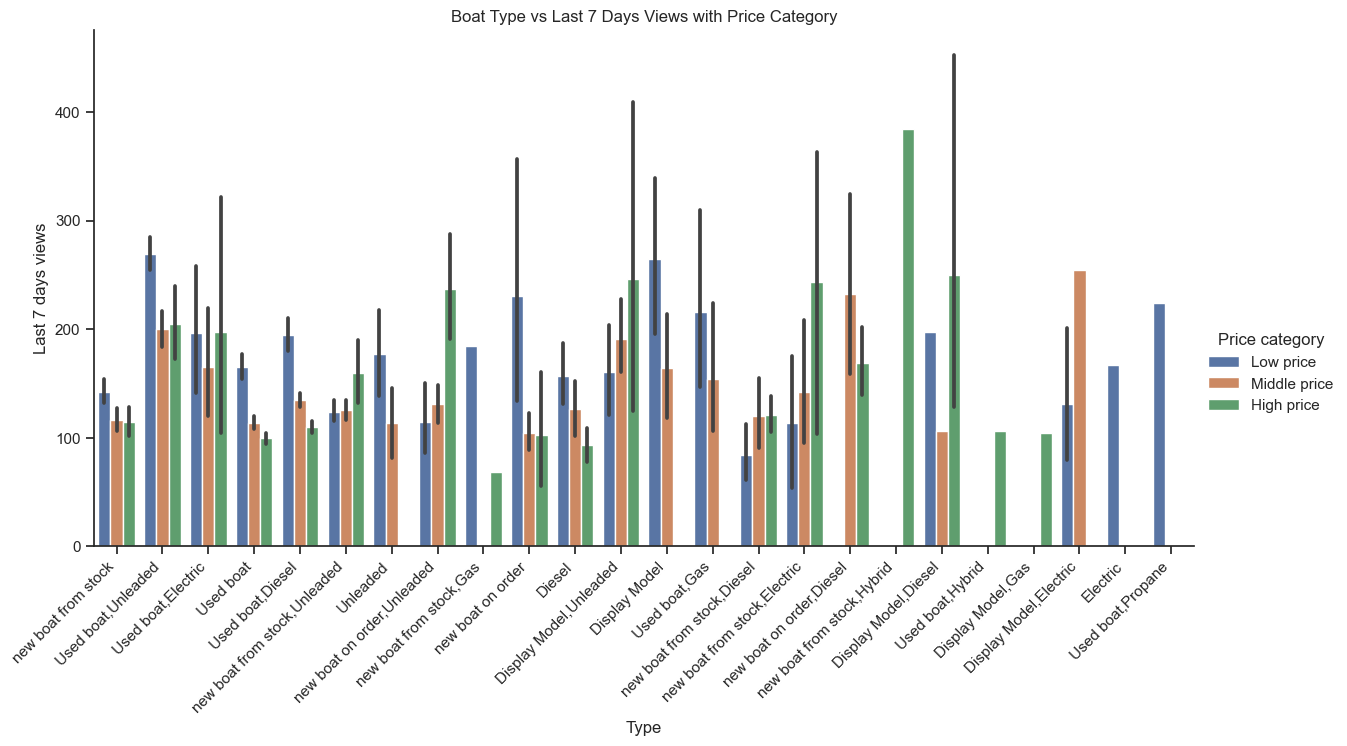

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.catplot(x='Type', y='Last 7 days views', hue='Price category', data=df, kind='bar', height=6, aspect=2)
plt.xticks(rotation=45, ha='right')
plt.title('Boat Type vs Last 7 Days Views with Price Category')
plt.show()



#### Some of them show us that the preferences continue to be diesel and used, maintaining the trend towards lower prices, in the case of hybrids, merely high cost values ​​are shown.

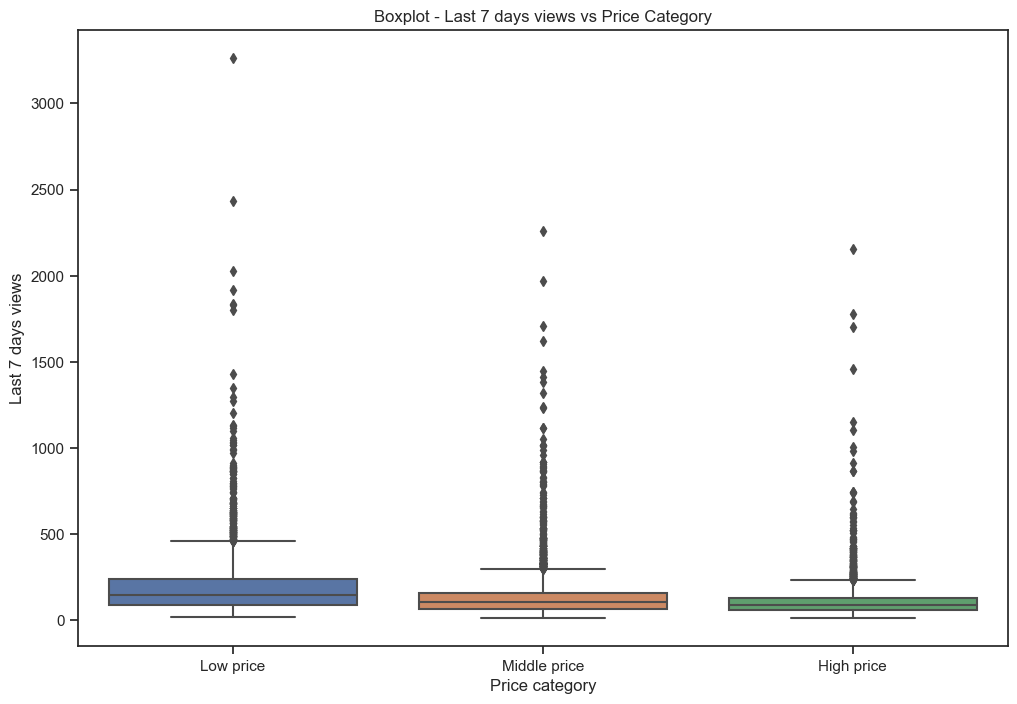

In [34]:
# Boxplot for Last 7 days views vs Price Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Price category', y='Last 7 days views', data=df)
plt.title('Boxplot - Last 7 days views vs Price Category')
plt.show()


#### We observe that the 'Low Price' boats have a larger interquartile range, indicating a wider spread of views, while the 'Middle Price' boats have a slightly smaller range. The 'High Price' boats exhibit the smallest interquartile range. This suggests that, on average, boats in the 'Low Price' category tend to have more varied views compared to 'Middle Price' and 'High Price' boats.

#### Additionally, the presence of outliers, shown as individual points beyond the 'whiskers' of the box, indicates boats with exceptionally high views compared to the majority within their respective price categories."

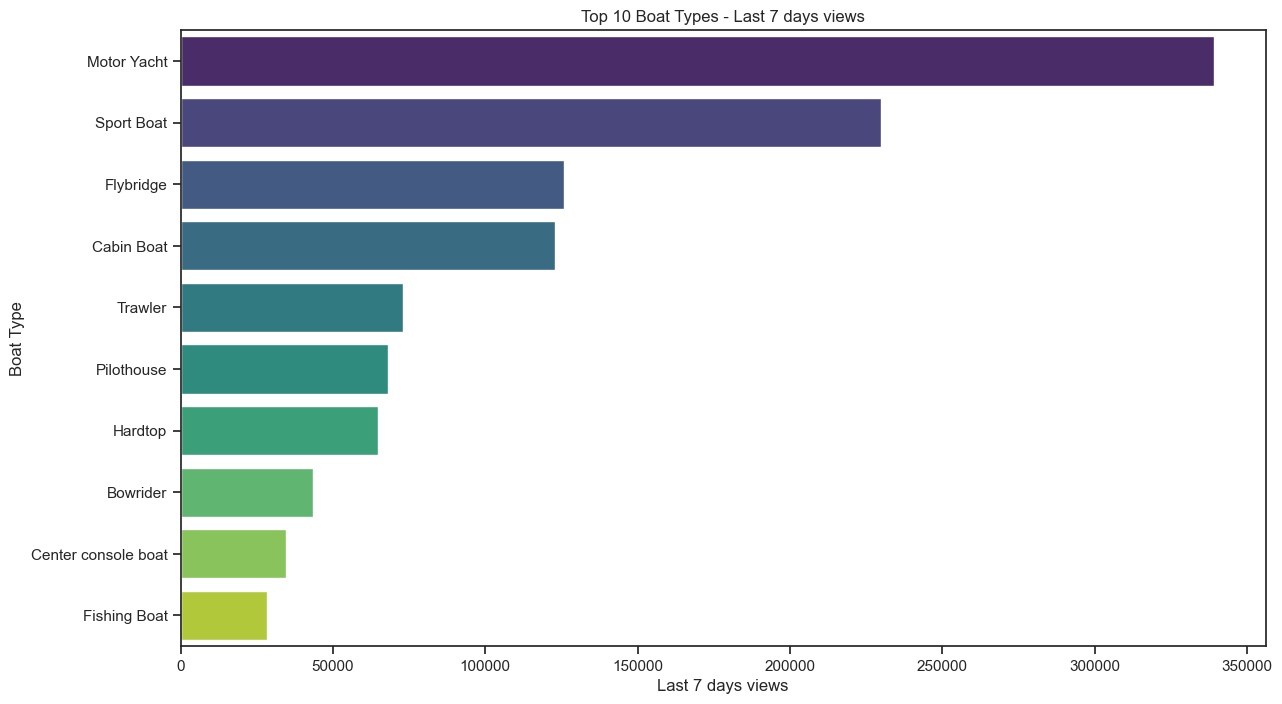

In [35]:
# Get the top 10 boat types with the most views in Last 7 days
top_10_types = df.groupby('Boat Type')['Last 7 days views'].sum().sort_values(ascending=False).head(10)

# Organize the bar plot by the top positions (from highest to lowest)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_types.values, y=top_10_types.index, ci=None, palette='viridis')
plt.title('Top 10 Boat Types - Last 7 days views')
plt.xlabel('Last 7 days views')
plt.ylabel('Boat Type')
plt.show()


#### These are the ten most visited types of boats in the last 7 days, which leads us to see the interest of users in their preferences, sponsorship campaigns could be implemented due to the high number of visits, increasing advertising income.

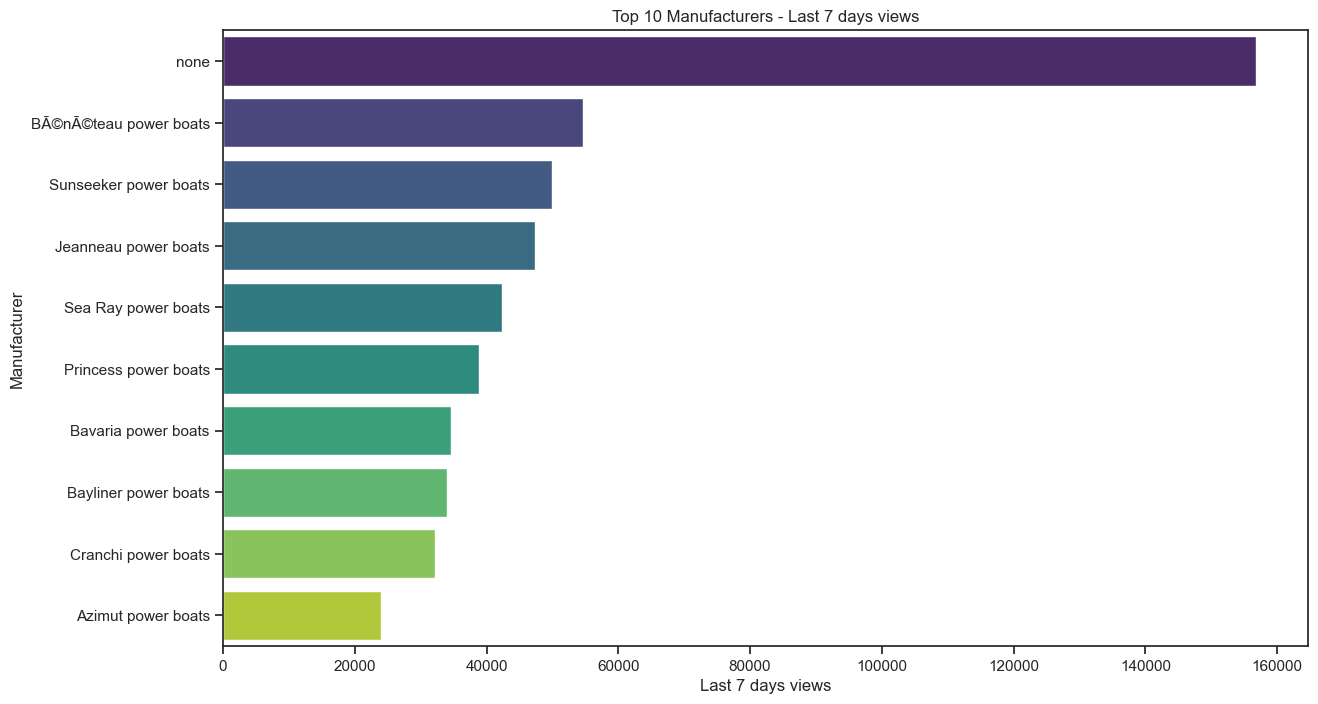

In [36]:
# Get the top 10 manufacturers with the most views in Last 7 days
top_10_manufacturers = df.groupby('Manufacturer')['Last 7 days views'].sum().sort_values(ascending=False).head(10)

# Organize the bar plot by the top positions (from highest to lowest)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_manufacturers.values, y=top_10_manufacturers.index, ci=None, palette='viridis')
plt.title('Top 10 Manufacturers - Last 7 days views')
plt.xlabel('Last 7 days views')
plt.ylabel('Manufacturer')
plt.show()


#### All the undefined values ​​are found, which were applied, to continue with the analysis, the company's management knowing this previously, which is one of the questions that they want to resolve, since it is suspected that some users do not complete the initial survey. Of the rest we can see the most visited boat manufacturers on the site

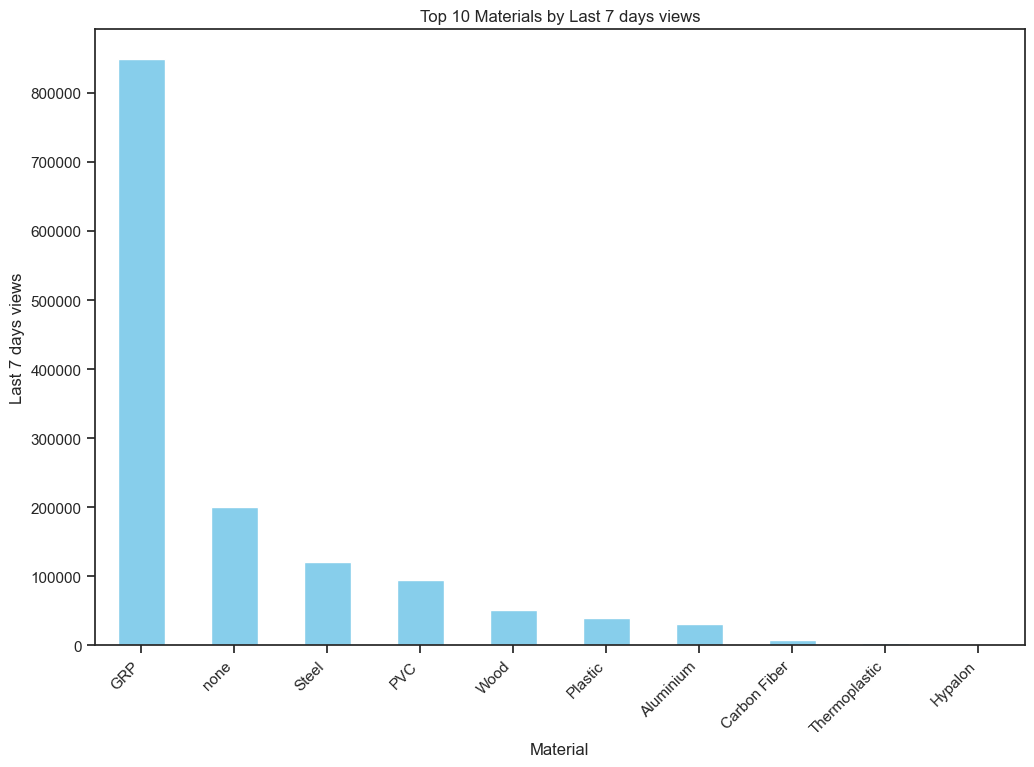

In [37]:
# Get the top 10 materials with the most views
top_materials = df.groupby('Material')['Last 7 days views'].sum().nlargest(10)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the bar chart
top_materials.plot(kind='bar', title='Top 10 Materials by Last 7 days views', color='skyblue')

# Add labels and title
plt.xlabel('Material')
plt.ylabel('Last 7 days views')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



#### Boats made from certain materials seem to show greater preference or acceptance by website visitors.which may be linked to manufacturers or types of boats

C:\Users\gered\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


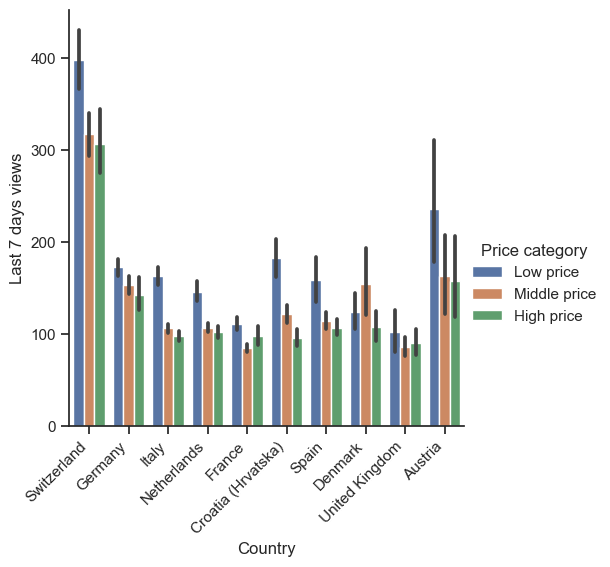

In [38]:
# Select the top 10 countries based on total number of views
top_countries = df.groupby('Country')['Last 7 days views'].sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="Country", y="Last 7 days views", hue="Price category", data=df_top_countries, kind="bar", order=top_countries)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


#### The 10 countries that received the most views in price categories, confirming for each country that the most viewed categories are the low price followed by the middle price, and to a lesser extent the highest prices

### 4. Conclusions


### Answer previous questions

##### What are Number views in the las 7 days of boats made of a certain material.
    We have for the boats made of "GRP" material with almost 900,000 views in the last 7 days which shows the majority of views on the website by materials,
    
##### What are Number views in the las 7 days of boats made from a specific country.
    You can clearly see how Switzerland, Germany and Austria have the most views in the last 7 days, in addition to those visits they focus on low-priced boats for the most part.

##### What are Number views in the las 7 days of boats from each manufacturer.
    We have some undefined manufacturers, possibly due to poor management in filling out the registration form. Likewise, we can see the manufacturers most ranked by views on the platform, which suggests certain preferences for brands when looking for choices.
   
##### What are Number views in the las 7 days of boats per boat type.
    Some of them show us that the preferences continue to be diesel and used, maintaining the trend towards lower prices, in the case of hybrids, merely high cost values ​​are shown.

##### What are Number views in the las 7 days of boats per year built.
    A considerable number of views are shown on models from the 80s to date.
    most showing high influx of visits for certain models with specific characteristics
    
##### What is the number of views that the boats have according to their price category? 
    The lowest-priced boats have the highest visits to the pages, followed by the middle-priced boats, and fewer visits to the most expensive ones, which determines the high influx according to the price of the higher-priced boats, fewer views.    

### Propose hypothesis

#### The hypothesis is that specific characteristics of vessels, such as type, length, width, material and country of origin, can significantly influence the number of visits they receive in the last 7 days.
#### Additionally, there is a possibility that certain price categories have an impact on views, suggesting that there are audience preferences based on price range.
#### "This analysis provides a detailed view of how various characteristics and factors can affect the visibility and interest of vessels on the platform."

In [39]:
# Export Data frame
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boats_relations.csv'))